In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import tqdm
import cv2

In [66]:
df = pd.read_csv("metadata.csv")

In [67]:
df.head(20)

,isic_id,attribution,copyright_license,age_approx,anatom_site_general,anatom_site_special,concomitant_biopsy,diagnosis_1,diagnosis_2,diagnosis_3,diagnosis_4,diagnosis_confirm_type,image_manipulation,image_type,lesion_id,melanocytic,sex
0,ISIC_0051817,MILK study team,CC-BY-NC,70.0,upper extremity,NaN,True,Malignant,Malignant epidermal proliferations,"Squamous cell carcinoma, Invasive",NaN,histopathology,instrument only,dermoscopic,IL_1612768,NaN,male
1,ISIC_0073863,MILK study team,CC-BY-NC,5.0,NaN,NaN,True,Benign,Benign melanocytic proliferations,Nevus,"Nevus, Reed",histopathology,instrument only,dermoscopic,IL_2547802,True,female
2,ISIC_0075884,MILK study team,CC-BY-NC,10.0,upper extremity,NaN,True,Benign,Benign melanocytic proliferations,Nevus,"Nevus, Acral",histopathology,instrument only,clinical: close-up,IL_9270970,True,female
3,ISIC_0076255,MILK study team,CC-BY-NC,50.0,head/neck,NaN,True,Malignant,Malignant adnexal epithelial proliferations - ...,Basal cell carcinoma,NaN,histopathology,instrument only,dermoscopic,IL_8089688,NaN,female
4,ISIC_0077054,MILK study team,CC-BY-NC,75.0,head/neck,NaN,True,Malignant,Malignant adnexal epithelial proliferations - ...,Basal cell carcinoma,NaN,histopathology,instrument only,dermoscopic,IL_5271098,NaN,male
5,ISIC_0078190,MILK study team,CC-BY-NC,85.0,lower extremity,NaN,True,Malignant,Malignant epidermal proliferations,Squamous cell carcinoma in situ,"Squamous cell carcinoma in situ, Bowens disease",histopathology,instrument only,dermoscopic,IL_4115404,NaN,female
6,ISIC_0078197,MILK study team,CC-BY-NC,50.0,head/neck,NaN,True,Benign,Benign melanocytic proliferations,Nevus,"Nevus, NOS, Dermal",histopathology,instrument only,clinical: close-up,IL_4635992,True,male
7,ISIC_0080019,MILK study team,CC-BY-NC,70.0,upper extremity,NaN,True,Malignant,Malignant adnexal epithelial proliferations - ...,Basal cell carcinoma,NaN,histopathology,instrument only,clinical: close-up,IL_9208680,NaN,male
8,ISIC_0080219,MILK study team,CC-BY-NC,45.0,NaN,NaN,True,Benign,Benign melanocytic proliferations,Nevus,"Nevus, NOS, Compound",histopathology,instrument only,dermoscopic,IL_5310300,True,male
9,ISIC_0081055,MILK study team,CC-BY-NC,70.0,NaN,NaN,True,Malignant,Malignant adnexal epithelial proliferations - ...,Basal cell carcinoma,NaN,histopathology,instrument only,dermoscopic,IL_3426033,NaN,male


In [68]:
df.shape

(10480, 17)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 10480 non-null  object 
 1   attribution             10480 non-null  object 
 2   copyright_license       10480 non-null  object 
 3   age_approx              10440 non-null  float64
 4   anatom_site_general     6568 non-null   object 
 5   anatom_site_special     206 non-null    object 
 6   concomitant_biopsy      10480 non-null  bool   
 7   diagnosis_1             10480 non-null  object 
 8   diagnosis_2             10480 non-null  object 
 9   diagnosis_3             10322 non-null  object 
 10  diagnosis_4             1522 non-null   object 
 11  diagnosis_confirm_type  10480 non-null  object 
 12  image_manipulation      10480 non-null  object 
 13  image_type              10480 non-null  object 
 14  lesion_id               10480 non-null

In [70]:
df.isnull().sum()

isic_id                       0
attribution                   0
copyright_license             0
age_approx                   40
anatom_site_general        3912
anatom_site_special       10274
concomitant_biopsy            0
diagnosis_1                   0
diagnosis_2                   0
diagnosis_3                 158
diagnosis_4                8958
diagnosis_confirm_type        0
image_manipulation            0
image_type                    0
lesion_id                     0
melanocytic                8088
sex                           0
dtype: int64

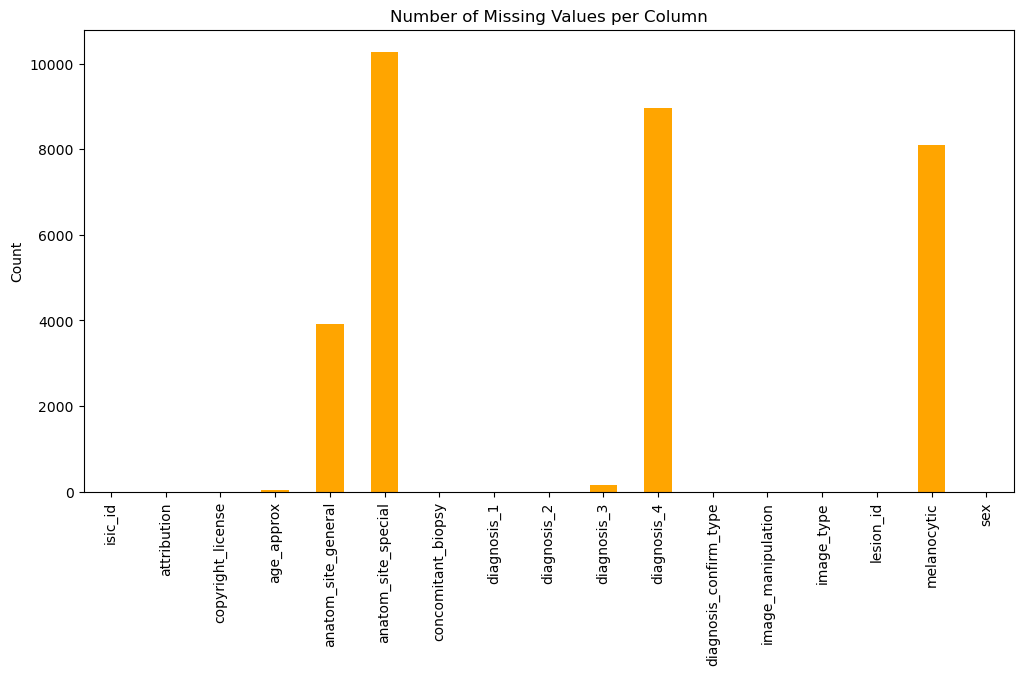

In [71]:
df.isnull().sum().plot(kind='bar', figsize=(12,6), color='orange')
plt.title('Number of Missing Values per Column')
plt.ylabel('Count')
plt.show()


In [72]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage[missing_percentage > 0])


age_approx              0.381679
anatom_site_general    37.328244
anatom_site_special    98.034351
diagnosis_3             1.507634
diagnosis_4            85.477099
melanocytic            77.175573
dtype: float64


In [73]:
df = df.drop(["anatom_site_special","diagnosis_4","diagnosis_3","diagnosis_2","melanocytic","lesion_id","attribution","copyright_license"], axis=1)


In [74]:
df.shape

(10480, 9)

In [75]:
df.shape

(10480, 9)

In [76]:
df.isnull().sum()

isic_id                      0
age_approx                  40
anatom_site_general       3912
concomitant_biopsy           0
diagnosis_1                  0
diagnosis_confirm_type       0
image_manipulation           0
image_type                   0
sex                          0
dtype: int64

In [77]:
df['age_approx'].describe()

count    10440.000000
mean        61.355364
std         15.691646
min          5.000000
25%         50.000000
50%         65.000000
75%         75.000000
max         85.000000
Name: age_approx, dtype: float64

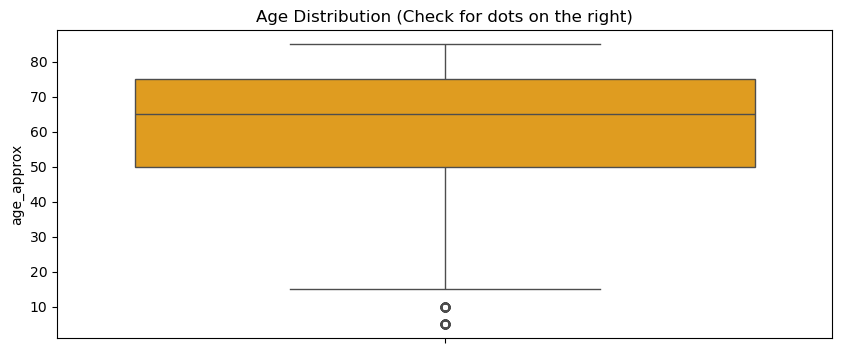

In [78]:
plt.figure(figsize=(10, 4))
sns.boxplot(df['age_approx'], color='orange')
plt.title('Age Distribution (Check for dots on the right)')
plt.show()

In [79]:
median_age = df['age_approx'].median()
df['age_approx'] = df['age_approx'].fillna(median_age)

In [80]:
mode_site = df['anatom_site_general'].mode()[0]
df['anatom_site_general'] = df['anatom_site_general'].fillna(mode_site)


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10480 entries, 0 to 10479
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isic_id                 10480 non-null  object 
 1   age_approx              10480 non-null  float64
 2   anatom_site_general     10480 non-null  object 
 3   concomitant_biopsy      10480 non-null  bool   
 4   diagnosis_1             10480 non-null  object 
 5   diagnosis_confirm_type  10480 non-null  object 
 6   image_manipulation      10480 non-null  object 
 7   image_type              10480 non-null  object 
 8   sex                     10480 non-null  object 
dtypes: bool(1), float64(1), object(7)
memory usage: 665.4+ KB


In [82]:
df.isnull().sum()

isic_id                   0
age_approx                0
anatom_site_general       0
concomitant_biopsy        0
diagnosis_1               0
diagnosis_confirm_type    0
image_manipulation        0
image_type                0
sex                       0
dtype: int64

In [83]:
df.head()

,isic_id,age_approx,anatom_site_general,concomitant_biopsy,diagnosis_1,diagnosis_confirm_type,image_manipulation,image_type,sex
0,ISIC_0051817,70.0,upper extremity,True,Malignant,histopathology,instrument only,dermoscopic,male
1,ISIC_0073863,5.0,head/neck,True,Benign,histopathology,instrument only,dermoscopic,female
2,ISIC_0075884,10.0,upper extremity,True,Benign,histopathology,instrument only,clinical: close-up,female
3,ISIC_0076255,50.0,head/neck,True,Malignant,histopathology,instrument only,dermoscopic,female
4,ISIC_0077054,75.0,head/neck,True,Malignant,histopathology,instrument only,dermoscopic,male


In [84]:
df["diagnosis_1"].value_counts()

diagnosis_1
Malignant        7268
Benign           2966
Indeterminate     246
Name: count, dtype: int64

In [85]:
df['diagnosis_1'] = df['diagnosis_1'].replace('Indeterminate', 'Benign')

In [86]:
cols_to_encode = [
    'anatom_site_general', 
    'concomitant_biopsy', 
    'diagnosis_confirm_type', 
    'image_manipulation', 
    'image_type', 
    'sex'
]

for col in cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_target = LabelEncoder()


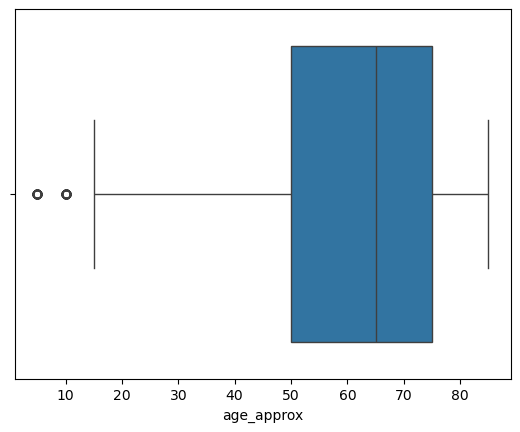

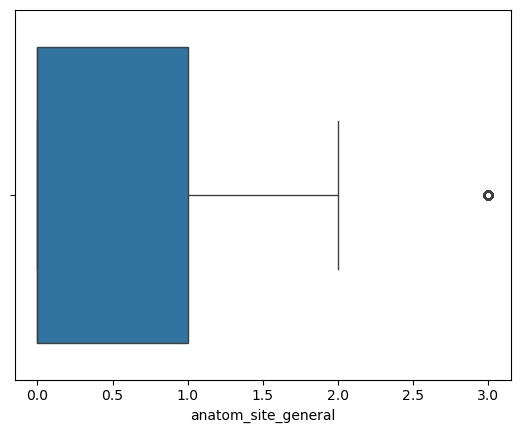

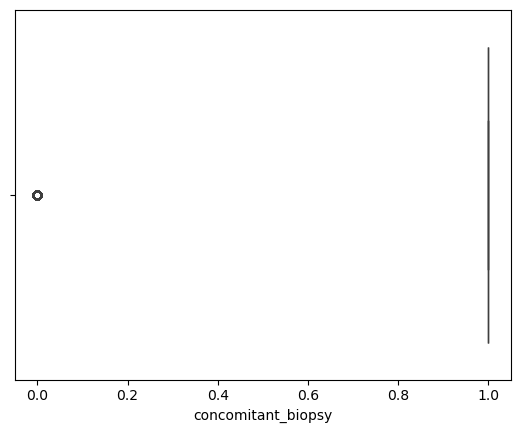

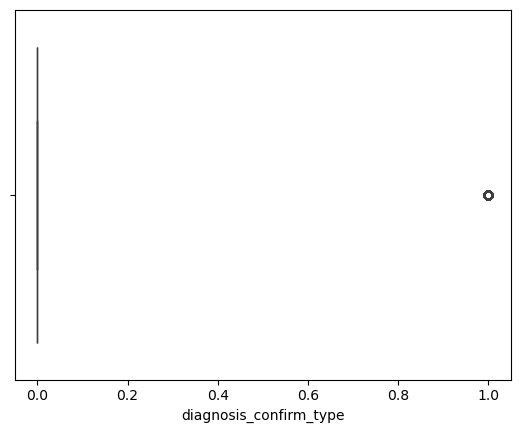

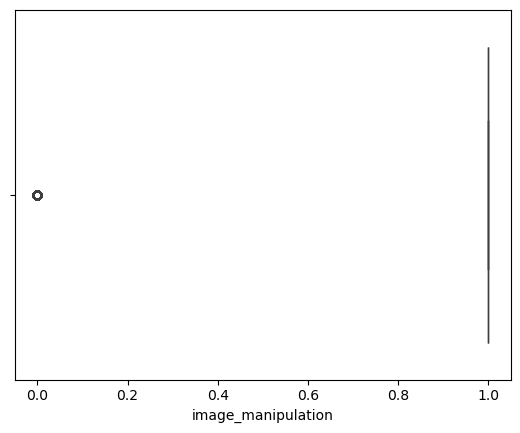

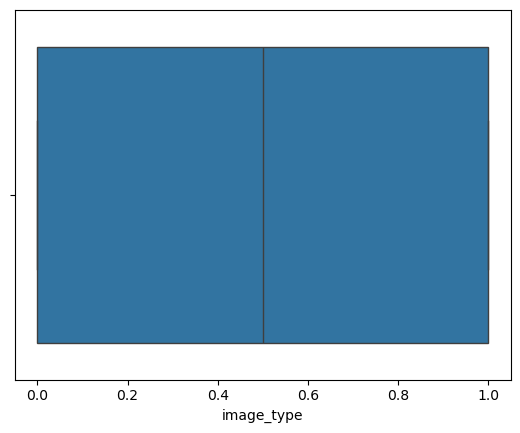

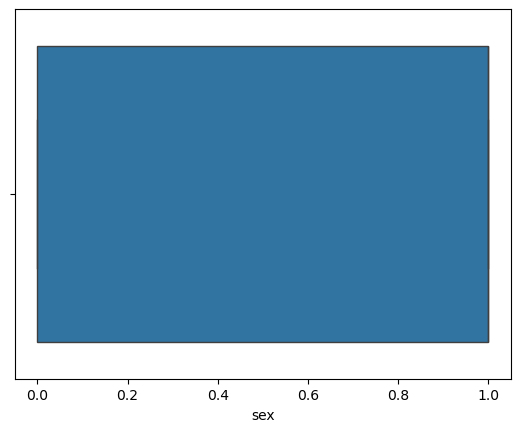

In [87]:
for i in df.select_dtypes(include = "number"):
  sns.boxplot(data = df, x = df[i])
  plt.show()

In [88]:
df.head()

,isic_id,age_approx,anatom_site_general,concomitant_biopsy,diagnosis_1,diagnosis_confirm_type,image_manipulation,image_type,sex
0,ISIC_0051817,70.0,3,1,Malignant,0,1,1,1
1,ISIC_0073863,5.0,0,1,Benign,0,1,1,0
2,ISIC_0075884,10.0,3,1,Benign,0,1,0,0
3,ISIC_0076255,50.0,0,1,Malignant,0,1,1,0
4,ISIC_0077054,75.0,0,1,Malignant,0,1,1,1


In [89]:
df['target'] = le_target.fit_transform(df['diagnosis_1'])
df = df.drop('diagnosis_1', axis=1)


In [90]:
df.head()

,isic_id,age_approx,anatom_site_general,concomitant_biopsy,diagnosis_confirm_type,image_manipulation,image_type,sex,target
0,ISIC_0051817,70.0,3,1,0,1,1,1,1
1,ISIC_0073863,5.0,0,1,0,1,1,0,0
2,ISIC_0075884,10.0,3,1,0,1,0,0,0
3,ISIC_0076255,50.0,0,1,0,1,1,0,1
4,ISIC_0077054,75.0,0,1,0,1,1,1,1


In [91]:
dfi = r"D:\mlproject\milk10k\images"
df['image_path'] = dfi + "\\" + df['isic_id'] + ".jpg"


In [92]:
df.head()

,isic_id,age_approx,anatom_site_general,concomitant_biopsy,diagnosis_confirm_type,image_manipulation,image_type,sex,target,image_path
0,ISIC_0051817,70.0,3,1,0,1,1,1,1,D:\mlproject\milk10k\images\ISIC_0051817.jpg
1,ISIC_0073863,5.0,0,1,0,1,1,0,0,D:\mlproject\milk10k\images\ISIC_0073863.jpg
2,ISIC_0075884,10.0,3,1,0,1,0,0,0,D:\mlproject\milk10k\images\ISIC_0075884.jpg
3,ISIC_0076255,50.0,0,1,0,1,1,0,1,D:\mlproject\milk10k\images\ISIC_0076255.jpg
4,ISIC_0077054,75.0,0,1,0,1,1,1,1,D:\mlproject\milk10k\images\ISIC_0077054.jpg


In [94]:
df.drop('isic_id', axis=1, inplace=True)

In [95]:
df2 = df[["target", "image_path"]]

In [96]:
df2.head()

,target,image_path
0,1,D:\mlproject\milk10k\images\ISIC_0051817.jpg
1,0,D:\mlproject\milk10k\images\ISIC_0073863.jpg
2,0,D:\mlproject\milk10k\images\ISIC_0075884.jpg
3,1,D:\mlproject\milk10k\images\ISIC_0076255.jpg
4,1,D:\mlproject\milk10k\images\ISIC_0077054.jpg


In [97]:
df.drop('image_path', axis=1, inplace=True)

In [98]:
df.head()

,age_approx,anatom_site_general,concomitant_biopsy,diagnosis_confirm_type,image_manipulation,image_type,sex,target
0,70.0,3,1,0,1,1,1,1
1,5.0,0,1,0,1,1,0,0
2,10.0,3,1,0,1,0,0,0
3,50.0,0,1,0,1,1,0,1
4,75.0,0,1,0,1,1,1,1


In [ ]:
#df.to_csv("Tabular_data.csv", index=False)

In [ ]:
#df2.to_csv("Image_data.csv", index=False)

In [101]:
df2.head()

,target,image_path
0,1,D:\mlproject\milk10k\images\ISIC_0051817.jpg
1,0,D:\mlproject\milk10k\images\ISIC_0073863.jpg
2,0,D:\mlproject\milk10k\images\ISIC_0075884.jpg
3,1,D:\mlproject\milk10k\images\ISIC_0076255.jpg
4,1,D:\mlproject\milk10k\images\ISIC_0077054.jpg


In [109]:
IMG_SIZE = (128, 128)
processed_images = []
print("Starting image processing and adding to dataset...")
for path in tqdm.tqdm(df2['image_path']):
    img = cv2.imread(path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, IMG_SIZE)
        img = img.astype('float32') / 255.0
        processed_images.append(img)
    else:
        processed_images.append(np.zeros((IMG_SIZE[0], IMG_SIZE[1], 3)))
        print(f"Warning: Corrupted image at path {path}")
df2['image_data'] = processed_images
print("Image processing completed successfully!")
print(df2.head())


Starting image processing and adding to dataset...


100%|██████████| 10480/10480 [00:24<00:00, 423.74it/s]
C:\Users\LOQ\AppData\Local\Temp\ipykernel_25440\3735091408.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['image_data'] = processed_images


Image processing completed successfully!
   target                                    image_path  \
0       1  D:\mlproject\milk10k\images\ISIC_0051817.jpg   
1       0  D:\mlproject\milk10k\images\ISIC_0073863.jpg   
2       0  D:\mlproject\milk10k\images\ISIC_0075884.jpg   
3       1  D:\mlproject\milk10k\images\ISIC_0076255.jpg   
4       1  D:\mlproject\milk10k\images\ISIC_0077054.jpg   

                                          image_data  
0  [[[0.3372549, 0.18431373, 0.18431373], [0.3960...  
1  [[[0.6313726, 0.5647059, 0.53333336], [0.63921...  
2  [[[0.60784316, 0.54509807, 0.4862745], [0.6156...  
3  [[[0.7019608, 0.52156866, 0.41960785], [0.7098...  
4  [[[0.5686275, 0.49411765, 0.57254905], [0.5647...  


In [110]:
df2.head()

,target,image_path,image_data
0,1,D:\mlproject\milk10k\images\ISIC_0051817.jpg,"[[[0.3372549, 0.18431373, 0.18431373], [0.3960..."
1,0,D:\mlproject\milk10k\images\ISIC_0073863.jpg,"[[[0.6313726, 0.5647059, 0.53333336], [0.63921..."
2,0,D:\mlproject\milk10k\images\ISIC_0075884.jpg,"[[[0.60784316, 0.54509807, 0.4862745], [0.6156..."
3,1,D:\mlproject\milk10k\images\ISIC_0076255.jpg,"[[[0.7019608, 0.52156866, 0.41960785], [0.7098..."
4,1,D:\mlproject\milk10k\images\ISIC_0077054.jpg,"[[[0.5686275, 0.49411765, 0.57254905], [0.5647..."


In [111]:
df2.drop('image_path', axis=1, inplace=True)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_25440\2762039032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop('image_path', axis=1, inplace=True)


In [112]:
df2.head()

,target,image_data
0,1,"[[[0.3372549, 0.18431373, 0.18431373], [0.3960..."
1,0,"[[[0.6313726, 0.5647059, 0.53333336], [0.63921..."
2,0,"[[[0.60784316, 0.54509807, 0.4862745], [0.6156..."
3,1,"[[[0.7019608, 0.52156866, 0.41960785], [0.7098..."
4,1,"[[[0.5686275, 0.49411765, 0.57254905], [0.5647..."


In [113]:
df2.to_csv("Image_data_processed.csv", index=False)